# Scientific computing

## Linear regression

- OLS: Bivarite regression (scipy:leastsq)
- OLS: Bivarate regression (equation)
- MLE: Bivarate regression (scipy:minimize)
- OLS: Multiple regression (gradient descent)
- OLS: Matrix
- Statsmodels

![](http://www.leouieda.com/images/thumb/scipy2017-proposal-gmt.png)
![](http://www.statsmodels.org/stable/_static/statsmodels_hybi_banner.png)

### OLS: (scipy:leastsq)


$$\min_{\beta_0,\beta_1} \sum_{i=1}^n[Y_i-(\beta_0+\beta_1X_i)]^2$$

![](https://raw.githubusercontent.com/mattnedrich/GradientDescentExample/master/gradient_descent_example.gif)

In [4]:
##https://stackoverflow.com/questions/19791581/how-to-use-leastsq-function-from-scipy-optimize-in-python-to-fit-both-a-straight
##import the modules including leastsq
from scipy.optimize import leastsq
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## equation
def lik(paras):  
    for i in np.arange(0, len(x)):
        L=y-(paras[0]+paras[1]*x)
        return L

## dataset
# Reading Data
data = pd.read_csv('data/headbrain.csv')
data.head()

# Collecting X and Y
x = data['Head Size(cm^3)'].values
y = data['Brain Weight(grams)'].values

#x=np.array([1.0,2.5,3.5,4.0,1.1,1.8,2.2,3.7])
#y=np.array([6.008,15.722,27.130,33.772,5.257,9.549,11.098,28.828])

## leastsq from scipy.optimize to estimate the model
paras=leastsq(lik,np.array((1,1)))
print(paras)


##plot the figure
xx1=np.linspace(x.min(),x.max(),50)
yy1=paras[0][0]+ paras[0][1]*xx1
plt.plot(xx1,yy1,'r-',x,y,'bo')
plt.show();

(array([  3.25573421e+02,   2.63429339e-01]), 1)


[-6.18989526  9.43854354]


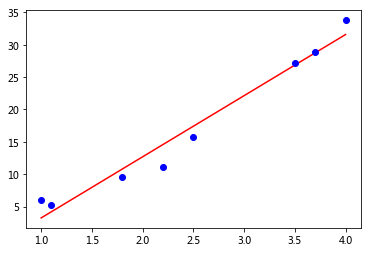

In [5]:
##https://stackoverflow.com/questions/19791581/how-to-use-leastsq-function-from-scipy-optimize-in-python-to-fit-both-a-straight
from scipy.optimize import leastsq
import numpy as np
import matplotlib.pyplot as plt

def main():
   # data provided
   x=np.array([1.0,2.5,3.5,4.0,1.1,1.8,2.2,3.7])
   y=np.array([6.008,15.722,27.130,33.772,5.257,9.549,11.098,28.828])
   ErrorFunc=lambda tpl,x,y: tpl[0]+tpl[1]*x-y
   tplFinal1,success=leastsq(ErrorFunc,np.array((1,1)),args=(x,y))
   print(tplFinal1)
   
   xx1=np.linspace(x.min(),x.max(),50)
 ##  yy1=funcLine(tplFinal1,xx1)
   yy1=tplFinal1[0]+ tplFinal1[1]*xx1
   plt.plot(xx1,yy1,'r-',x,y,'bo')
   plt.show()

if __name__=="__main__":
   main()

### OLS:equation

$$\min_{\beta_0,\beta_1} \sum_{i=1}^n[Y_i-(\beta_0+\beta_1X_i)]^2$$

$$ b_1 = \frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{ \sum_{i=1}^n(x_i-\bar{x})^2}$$

$$b_0=\bar{y}-b_1\bar{x}$$

In [6]:
#x=np.array([1.0,2.5,3.5,4.0,1.1,1.8,2.2,3.7])
#y=np.array([6.008,15.722,27.130,33.772,5.257,9.549,11.098,28.828])

## dataset
# Reading Data
data = pd.read_csv('data/headbrain.csv')
data.head()

# Collecting X and Y
x = data['Head Size(cm^3)'].values
y = data['Brain Weight(grams)'].values

# Mean of x and y
mean_x = np.mean(x)
mean_y = np.mean(y)

# Using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(len(x)):
    numer += (x[i] - mean_x) * (y[i] - mean_y)
    denom += (x[i] - mean_x) ** 2
 
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# Print coefficients
print(b1, b0)
np.polyfit(x,y,1)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


0.263429339489 325.573421049


array([  2.63429339e-01,   3.25573421e+02])

### Model evaluation: Root Mean Squared Error

$$RMSE = \sqrt{\sum_{i=1}^n(\frac{1}{m}(\hat{Y_i}-Y_i)^2) }$$

In [7]:
rmse = 0
for i in range(len(x)):
    y_pred = b0 + b1 * x[i]
    rmse += (y[i] - y_pred) ** 2

rmse = np.sqrt(rmse/len(x))
print(rmse)

72.1206213784


### Model evaluation: Measurement of Fit

$$ ESS = \sum_{i=1}^n(\hat{Y_i}-\bar{Y})^2$$
$$ TSS =  \sum_{i=1}^n(Y_i-\bar{Y})^2$$
$$ SSR =  \sum_{i=1}^n\hat{u}^2  $$

$$ TSS = ESS + SSR $$
$$R^2 = 1- \frac{SSR}{TSS}$$

In [8]:
TSS = 0
SSR = 0
for i in range(len(x)):
    y_pred = b0 + b1 * x[i]
    TSS += (y[i] - mean_y) ** 2
    SSR += (y[i] - y_pred) ** 2

r2 = 1 - (SSR/TSS);
print(r2)

0.639311719957


## Maximum likelihood estimation (scipy:minimize)

![](http://suriyadeepan.github.io/img/mle/lr2.png)

- likelihood function:

$$LF(\beta_0,\beta_1,\sigma^2))\ =\frac{1}{\sigma^{n}(\sqrt{2\pi})^n}e^{\{-\frac{1}{2}\sum\frac{  (y_i-\beta_0-\beta_1x_i)^2}{2\sigma}\}}$$


$$l = ln(LF(\beta_0,\beta_1,\sigma^2)) = -\frac{n}2ln(2\pi)-\frac{n}2ln\sigma^2-\frac{1}{2\sigma^2}\sum_{i=1}^n(Y_i-\beta_0-\beta_1 X_i)]^2$$

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


[  3.25609933e+02   2.63419288e-01   7.21216143e+01]


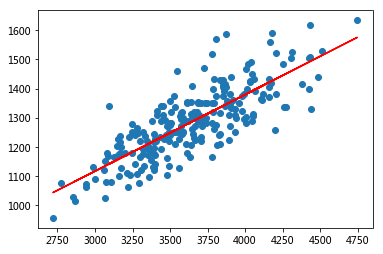

In [11]:
##https://stackoverflow.com/questions/29324222/how-can-i-do-a-maximum-likelihood-regression-using-scipy-optimize-minimize
##https://stackoverflow.com/questions/44587923/least-squares-method-in-practice
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

## formula
def lik(parameters):
    b0 = parameters[0]
    b1 = parameters[1]
    sigma = parameters[2]
    for i in np.arange(0, len(x)):
        y_hat = b1 * x + b0
    L = (len(x)/2 * np.log(2 * np.pi) + len(x)/2 * np.log(sigma ** 2) + 1 /
         (2 * sigma ** 2) * sum((y - y_hat) ** 2))
    return L

## dataset
#x=np.array([1.0,2.5,3.5,4.0,1.1,1.8,2.2,3.7])
#y=np.array([6.008,15.722,27.130,33.772,5.257,9.549,11.098,28.828])


## dataset
# Reading Data
data = pd.read_csv('data/headbrain.csv')
data.head()

# Collecting X and Y
x = data['Head Size(cm^3)'].values
y = data['Brain Weight(grams)'].values


## minimize from scipy.optimize 
lik_model = minimize(lik, np.array([1,1,1]), method='L-BFGS-B')
#Nelder-Mead
print(lik_model.x)

##plotting
plt.scatter(x,y)
plt.plot(x, lik_model['x'][0]+lik_model['x'][1] * x,'r-');
plt.show()

### Multiple Linear Regression

$$\mathbf{Y = X\boldsymbol{\beta+\varepsilon}}$$

$$\mathbf{X} = \left[\begin{array}
{rrrr}
1 & 2 & 3 & 5 \\
1 & 3 & 6 & 3 \\
1 & 7 & 9 & 2 \\
1 & 6 & 8 & 7 \\
1 & 2 & 5 & 9
\end{array}\right]
$$



$$\mathbf{Y} = \left[\begin{array}
{r}
2 \\
3 \\
5 \\
6 \\
9
\end{array}\right]
$$



### MLR: Gradient Descent

![](https://i.imgur.com/xnPvEok.gif)

In [12]:
data = pd.read_csv('data/student.csv')
data.head()
math = data['Math'].values
read = data['Reading'].values
write = data['Writing'].values

,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


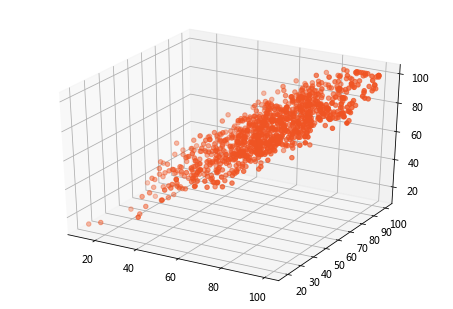

In [13]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(math, read, write, color='#ef5423')
plt.show();

In [14]:
n = len(math)
x0 = np.ones(n)
X = np.array([x0, math, read]).T
B = np.array([0, 0, 0])
Y = np.array(write)
alpha = 0.0001

def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

cost_function(X, Y, B)

def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        h = X.dot(B)
        loss = h - Y
        gradient = X.T.dot(loss) / m
        B = B - alpha * gradient
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)

cost_history[-1]

newB

2470.1100000000001

10.475123473539167

array([-0.47889172,  0.09137252,  0.90144884])

### MLR: matrix solution



$$\mathbf{b} = (X^{\prime}X)^{-1}X^{\prime}Y$$

In [19]:
import numpy as np
import pandas as pd
df1 = pd.read_csv('data/student.csv')
b1=df1.values

intercept = np.ones((b1.shape[0],1))
X = np.concatenate((intercept, b1[:,0:2]), axis=1)
X
b1[:,0:2].shape
X.shape


Y = b1[:,2].T 
Y.shape
Y[:5]
 
## Use the equation above (X'X)^(-1)X'Y to calculate OLS coefficient estimates:
bh = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y))
###np.linalg.inv(X.T @ data) @ X.T @ Y ##not correct
##a = np.linalg.inv(np.dot(X.T,X))## fine
##c = np.dot(X.T,Y)
##b = np.dot(a,c)
print(bh)


## check your work with Numpy's built in OLS function:
z,resid,rank,sigma = np.linalg.lstsq(X,Y)
print(z)

array([[  1.,  48.,  68.],
       [  1.,  62.,  81.],
       [  1.,  79.,  80.],
       ..., 
       [  1.,  89.,  87.],
       [  1.,  83.,  82.],
       [  1.,  66.,  66.]])

(1000, 2)

(1000, 3)

(1000,)

array([63, 72, 78, 79, 62])

[-1.46243738  0.09600221  0.91049989]
[-1.46243738  0.09600221  0.91049989]


## Model evaluation

In [16]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

Y_pred = X.dot(newB)

print(rmse(Y, Y_pred))
print(r2_score(Y, Y_pred))

4.57714397273
0.909722327306
